# 조선의 혼인 정치: 왕비와 후궁을 통해 본 왕권의 전략

조선시대 왕의 혼인은 단순한 개인사가 아니라, 권력과 정치의 연장선이었습니다.
    
왕비는 가문 간의 공식적인 동맹이었고, 후궁은 내부 정치와 총애의 균형을 상징했습니다.

왕의 결혼과 후궁 제도를 통해 조선의 정치 구조와 권력의 흐름을 이해해보려고 합니다.

---

`-` Data

## 왕비, 후궁 데이터 크롤링

In [182]:
# 저장 폴더 설정
output_dir <- "KQC_tabel"
dir.create(output_dir, showWarnings = FALSE)

# 조선 국왕 리스트
kings <- c(#1~9대 왕 리스트)

# 함수: URL에서 wikitable만 추출
tables_from_url <- function(url) {
  tryCatch({
    page <- read_html(url)
    page %>% html_nodes("table.wikitable")
  }, error = function(e) NULL)
}

# 함수: 왕비 테이블 추출
find_queen_table <- function(parsed_tables) {
  parsed_tables %>%
    keep(~ any(str_detect(names(.x), "시호")) & any(str_detect(.x[[1]], "왕비|정비|왕후"))) %>%
    first()
}

# 후궁 테이블 추출 (NA 방지 추가)
find_concubine_table <- function(parsed_tables) {
  parsed_tables %>%
    keep(~ {
      # 테이블의 모든 값에 대해 "빈|궁주|귀인|소생|후궁|숙의" 포함 여부
      values <- str_detect(unlist(.x), "빈|궁주|귀인|소생|후궁|숙의")
      # 열 이름에 "작호" 포함 여부
      has_title_col <- any(str_detect(names(.x), "작호"))
      
      # 둘 다 만족해야 keep됨
      any(replace_na(values, FALSE)) & has_title_col
    }) %>%
    first()
}

# 메인 루프
for (king in kings) {
  cat("처리 중:", king, "\n")
  url <- paste0("https://ko.wikipedia.org/wiki/", king)
  tables <- tables_from_url(url)
  
  if (is.null(tables)) {
    cat(" - 페이지 로딩 실패\n")
    next
  }
  
  # HTML 테이블 -> data.frame 파싱
  parsed_tables <- tables %>% map(~ html_table(.x, fill = TRUE))
  
  # 왕비 테이블
  queen_table <- find_queen_table(parsed_tables)
  if (!is.null(queen_table)) {
    write_csv(queen_table, file.path(output_dir, paste0(king, "_queen_table.csv")))
    cat("  ✔️ 왕비 테이블 저장\n")
  } else {
    cat("  ⚠️ 왕비 테이블 없음\n")
  }
  
  # 후궁 테이블
  concubine_table <- find_concubine_table(parsed_tables)
  if (!is.null(concubine_table)) {
    write_csv(concubine_table, file.path(output_dir, paste0(king, "_concubine_table.csv")))
    cat("  ✔️ 후궁 테이블 저장\n")
  } else {
    cat("  ⚠️ 후궁 테이블 없음\n")
  }
}

In [180]:
# 저장 폴더 설정
output_dir <- "KQC_tabel"
dir.create(output_dir, showWarnings = FALSE)

# 조선 국왕 리스트
kings <- c(#10~18대 왕 리스트)

# 함수: URL에서 wikitable만 추출
tables_from_url <- function(url) {
  tryCatch({
    page <- read_html(url)
    page %>% html_nodes("table.wikitable")
  }, error = function(e) NULL)
}

# 함수: 왕비 테이블 추출
find_queen_table <- function(parsed_tables) {
  parsed_tables %>%
    keep(~ any(str_detect(names(.x), "시호")) & any(str_detect(.x[[1]], "왕비|정비|왕후"))) %>%
    first()
}

# 후궁 테이블 추출 (NA 방지 추가)
find_concubine_table <- function(parsed_tables) {
  parsed_tables %>%
    keep(~ {
      # 테이블의 모든 값에 대해 "빈|궁주|귀인|소생|후궁|숙의" 포함 여부
      values <- str_detect(unlist(.x), "빈|궁주|귀인|소생|후궁|숙의")
      # 열 이름에 "작호" 포함 여부
      has_title_col <- any(str_detect(names(.x), "작호"))
      
      # 둘 다 만족해야 keep됨
      any(replace_na(values, FALSE)) & has_title_col
    }) %>%
    first()
}

# 메인 루프
for (king in kings) {
  cat("처리 중:", king, "\n")
  url <- paste0("https://ko.wikipedia.org/wiki/", king)
  tables <- tables_from_url(url)
  
  if (is.null(tables)) {
    cat(" - 페이지 로딩 실패\n")
    next
  }
  
  # HTML 테이블 -> data.frame 파싱
  parsed_tables <- tables %>% map(~ html_table(.x, fill = TRUE))
  
  # 왕비 테이블
  queen_table <- find_queen_table(parsed_tables)
  if (!is.null(queen_table)) {
    write_csv(queen_table, file.path(output_dir, paste0(king, "_queen_table.csv")))
    cat("  ✔️ 왕비 테이블 저장\n")
  } else {
    cat("  ⚠️ 왕비 테이블 없음\n")
  }
  
  # 후궁 테이블
  concubine_table <- find_concubine_table(parsed_tables)
  if (!is.null(concubine_table)) {
    write_csv(concubine_table, file.path(output_dir, paste0(king, "_concubine_table.csv")))
    cat("  ✔️ 후궁 테이블 저장\n")
  } else {
    cat("  ⚠️ 후궁 테이블 없음\n")
  }
}

In [181]:
# 저장 폴더 설정
output_dir <- "KQC_tabel"
dir.create(output_dir, showWarnings = FALSE)

# 조선 국왕 리스트
kings <- c(#19~27대 왕 리스트)

# 함수: URL에서 wikitable만 추출
tables_from_url <- function(url) {
  tryCatch({
    page <- read_html(url)
    page %>% html_nodes("table.wikitable")
  }, error = function(e) NULL)
}

# 함수: 왕비 테이블 추출
find_queen_table <- function(parsed_tables) {
  parsed_tables %>%
    keep(~ any(str_detect(names(.x), "시호")) & any(str_detect(.x[[1]], "왕비|정비|왕후"))) %>%
    first()
}

# 후궁 테이블 추출 (NA 방지 추가)
find_concubine_table <- function(parsed_tables) {
  parsed_tables %>%
    keep(~ {
      # 테이블의 모든 값에 대해 "빈|궁주|귀인|소생|후궁|숙의" 포함 여부
      values <- str_detect(unlist(.x), "빈|궁주|귀인|소생|후궁|숙의")
      # 열 이름에 "작호" 포함 여부
      has_title_col <- any(str_detect(names(.x), "작호"))
      
      # 둘 다 만족해야 keep됨
      any(replace_na(values, FALSE)) & has_title_col
    }) %>%
    first()
}

# 메인 루프
for (king in kings) {
  cat("처리 중:", king, "\n")
  url <- paste0("https://ko.wikipedia.org/wiki/", king)
  tables <- tables_from_url(url)
  
  if (is.null(tables)) {
    cat(" - 페이지 로딩 실패\n")
    next
  }
  
  # HTML 테이블 -> data.frame 파싱
  parsed_tables <- tables %>% map(~ html_table(.x, fill = TRUE))
  
  # 왕비 테이블
  queen_table <- find_queen_table(parsed_tables)
  if (!is.null(queen_table)) {
    write_csv(queen_table, file.path(output_dir, paste0(king, "_queen_table.csv")))
    cat("  ✔️ 왕비 테이블 저장\n")
  } else {
    cat("  ⚠️ 왕비 테이블 없음\n")
  }
  
  # 후궁 테이블
  concubine_table <- find_concubine_table(parsed_tables)
  if (!is.null(concubine_table)) {
    write_csv(concubine_table, file.path(output_dir, paste0(king, "_concubine_table.csv")))
    cat("  ✔️ 후궁 테이블 저장\n")
  } else {
    cat("  ⚠️ 후궁 테이블 없음\n")
  }
}

## Load data

In [369]:
import os
import pandas as pd

# CSV 파일들이 들어 있는 폴더 경로
folder_path = 'KQC_table' 

# 폴더 내 .csv 파일 리스트 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 테이블을 담을 딕셔너리
final_tables = {}

# 각 CSV 파일을 읽어서 딕셔너리에 저장
for file in csv_files:
    table_name = os.path.splitext(file)[0]  # 확장자 제거한 파일 이름
    file_path = os.path.join(folder_path, file)  # 전체 경로
    final_tables[table_name] = pd.read_csv(file_path)  # 읽어서 저장
    print(f"✅ {table_name} 테이블 로딩 완료")

✅ 효종_(조선)_concubine_table 테이블 로딩 완료
✅ 광해군_concubine_table 테이블 로딩 완료
✅ 선조_(조선)_queen_table 테이블 로딩 완료
✅ 인종_(조선)_queen_table 테이블 로딩 완료
✅ 세조_(조선)_queen_table 테이블 로딩 완료
✅ 성종_(조선)_queen_table 테이블 로딩 완료
✅ 철종_(조선)_concubine_table 테이블 로딩 완료
✅ 헌종_(조선)_concubine_table 테이블 로딩 완료
✅ 예종_(조선)_concubine_table 테이블 로딩 완료
✅ 인조_(조선)_concubine_table 테이블 로딩 완료
✅ 태종_(조선)_concubine_table 테이블 로딩 완료
✅ 영조_concubine_table 테이블 로딩 완료
✅ 효종_(조선)_queen_table 테이블 로딩 완료
✅ 정종_(조선)_concubine_table 테이블 로딩 완료
✅ 중종_(조선)_queen_table 테이블 로딩 완료
✅ 영조_queen_table 테이블 로딩 완료
✅ 경종_(조선)_queen_table 테이블 로딩 완료
✅ 고종_(대한제국)_concubine_table 테이블 로딩 완료
✅ 순종_(대한제국)_queen_table 테이블 로딩 완료
✅ 현종_(조선)_queen_table 테이블 로딩 완료
✅ 정조_queen_table 테이블 로딩 완료
✅ 성종_(조선)_concubine_table 테이블 로딩 완료
✅ 연산군_concubine_table 테이블 로딩 완료
✅ 헌종_(조선)_queen_table 테이블 로딩 완료
✅ 문종_(조선)_queen_table 테이블 로딩 완료
✅ 숙종_(조선)_queen_table 테이블 로딩 완료
✅ 명종_(조선)_queen_table 테이블 로딩 완료
✅ 예종_(조선)_queen_table 테이블 로딩 완료
✅ 선조_(조선)_concubine_table 테이블 로딩 완료
✅ 태종_(조선)_queen_table 테이블 로딩 완료
✅ 세종_co

---

# 1. 왕비

## 1-1. 왕비 데이터 전처리

`-` Resonance

In [183]:
queen_tables = []

for name, df in final_tables.items():
    if name.endswith('_queen_table'):
        queen_tables.append(df)
        
# 27개의 데이터프레임을 하나로 합치되, 필요한 열만 골라서, 없으면 None으로 채우기
combined_queen_df = pd.concat([
    pd.DataFrame([{
        '시호': df.get('시호', [None])[0] if '시호' in df else None,
        '시호.1': df.get('시호.1', [None])[0] if '시호.1' in df else None,
        '본관': df.get('본관', [None])[0] if '본관' in df else None,
        '생몰년': df.get('생몰년', [None])[0] if '생몰년' in df else None
    }]) for df in queen_tables
], ignore_index=True)

q_df1 = combined_queen_df[combined_queen_df['시호']=='정비']
q_df1['시호'] = q_df1['시호.1']

q_df2 = combined_queen_df[(combined_queen_df['시호']=='정비').apply(lambda x:not x)]

queen_df_final = pd.concat([q_df1,q_df2],axis=0).drop('시호.1',axis=1)

def clean_and_create_fullname_queen(df):
    # 1. '시호.1'에서 성씨만 추출 (예: '이씨')
    df['시호'] = df['시호'].apply(
        lambda l: l.split('씨')[0][-1] + '씨' if pd.notna(l) and str(l).lower() != 'nan' else l)
    # 3. '본관' + '성씨' 결합해서 새로운 컬럼 생성
    df['본관_성씨'] = df['본관'] + df['시호']
    # 4. 최종적으로 '본관_성씨'만 남기고 나머지는 제거
    df_final = df[df['본관_성씨'].notnull()].drop(['시호', '본관'], axis=1)
    return df_final

queen_final = clean_and_create_fullname_queen(queen_df_final).reset_index(drop = True)
queen_final

/tmp/ipykernel_94935/1511592098.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df1['시호'] = q_df1['시호.1']


,생몰년,본관_성씨
0,1555년 - 1600년,반남박씨
1,1456년 - 1474년,청주한씨
2,1487년 - 1557년,거창신씨
3,1693년 - 1757년,대구서씨
4,1828년 - 1843년,안동김씨
5,1661년 - 1680년,광산김씨
6,1594년 - 1636년,청주한씨
7,1514년 - 1578년,반남박씨
8,1418년 - 1483년,파평윤씨
9,1618년 - 1674년,덕수장씨


`-` Insight -> Problem

## 1-2. 왕비를 많이 배출한 가문

In [371]:
queen_final['본관_성씨'].value_counts()[:6]

본관_성씨
청주한씨    3
안동김씨    3
청송심씨    3
여흥민씨    3
반남박씨    2
청풍김씨    2
Name: count, dtype: int64

청주 한씨 : 조선 초기 외척의 핵심

안동 김씨 : 조선 말기 권력의 상징이자 세도 정치의 중심

청송 심씨 : 태종 ~ 세종 대에 가장 영향력 있는 외척

이를 통해 왕과의 결혼을 통해 가문의 영향력을 드높혔다는 것, 그리고 왕도 왕권을 위해서 강한 힘을 가지고 있는 가문의 딸과 결혼을 했다는 것을 알 수 있다.

---

`-` Data / Resonance 

# 2. 후궁

In [372]:
import pandas as pd

# 결과 저장용 빈 리스트
concubine_tables = []

# 통일할 컬럼 리스트
columns = ['작호','작호.1','본관']

# 딕셔너리에서 queen 테이블만 추출
for name, df in final_tables.items():
    if name.endswith('_concubine_table'):
        # 누락된 컬럼은 None으로 추가
        for col in columns:
            if col not in df.columns:
                df[col] = None
        # 컬럼 순서 맞추고, 나머지는 제거
        df = df[columns]
        concubine_tables.append(df)

# 통합
concubine_tables = pd.concat(concubine_tables, ignore_index=True)

# 확인 출력
print(f"👸 후궁 통합 테이블 (작호.1, 본관): {concubine_tables.shape}")
concubine_tables

👸 후궁 통합 테이블 (작호.1, 본관): (177, 3)


,작호,작호.1,본관
0,빈,안빈 이씨安嬪 李氏,경주
1,숙의,숙의 김씨淑儀 金氏,미상
2,숙원,숙원 정씨淑媛 鄭氏,미상
3,빈,수빈 허씨粹嬪 許氏숙의 허씨淑儀 許氏,양천
4,소의,소의 윤씨昭儀 尹氏,파평
...,...,...,...
172,세자빈,폐세자빈 순빈 봉씨 廢世子嬪 純嬪 奉氏,하음
173,비,수비 박씨綏妃 朴氏[171]현목수빈顯穆綏嬪현목수비顯穆綏妃,반남
174,빈,의빈 성씨宜嬪 成氏,창녕
175,빈,원빈 홍씨元嬪 洪氏,풍산


`-` Insight

## 2-1. 후궁 작호의 비밀

후궁의 작호는 여러 가지 사회적, 정치적 기준을 바탕으로 정해졌다.

후궁의 작호는 단순히 신분을 나타내는 칭호 이상의 의미를 지니고 있으며 왕실의 정치적, 군사적, 사회적 배경과 관련이 깊다.

황귀비, 귀비: 최고 등급

빈(숙빈,희빈 등), 귀인(빈보다는 아래지만 상당히 높음) : 상위 작호

숙의, 숙원, 숙용, 소의, 소원, 소용 : 중위 작호

나인, 궁인, 상궁, 상침, 찬덕: 하위 작호

비, 사기, 양제, 세자빈(왕세자의 부인), 용주(왕의 서녀. 왕과 후궁 사이에서 태어난 딸)

In [373]:
작호_list = [name for name,group in concubine_dfs.items()]
작호_list

['궁인',
 '궁주',
 '귀인',
 '기타',
 '나인',
 '비',
 '빈',
 '사기',
 '상궁',
 '상침',
 '세자빈',
 '소용',
 '소원',
 '소의',
 '숙용',
 '숙원',
 '숙의',
 '양제',
 '옹주',
 '찬덕',
 '황귀비']

## 2-2. 후궁 데이터 전처리

In [374]:
high_rank = ['황귀비', '귀비', '빈', '귀인']
mid_rank = ['숙의', '숙원', '숙용', '소의', '소원', '소용']
low_rank = ['궁인', '나인', '상궁', '상침', '찬덕']
others = ['비', '세자빈', '옹주', '사기', '양제', '궁주']

import pandas as pd

def clean_and_create_fullname_concubine(df):
    # 1. '본관'과 '작호.1'이 결측값(NaN, None, '미상')이 아닌 행 필터링
    df_clean = df[
        df['본관'].notnull() & (df['본관'] != '미상') &
        df['작호.1'].notnull() & (df['작호.1'].str.lower() != 'nan')
    ].copy()
    # 2. '작호.1'에서 성씨만 추출 (예: '이씨')
    df_clean['작호.1'] = df_clean['작호.1'].apply(
        lambda l: l.split('씨')[0][-1] + '씨' if pd.notna(l) and str(l).lower() != 'nan' else l)
    # 3. '본관' + '성씨' 결합해서 새로운 컬럼 생성
    df_clean['본관_성씨'] = df_clean['본관'] + df_clean['작호.1']
    # 4. 최종적으로 '본관_성씨'만 남기고 나머지는 제거
    df_final = df_clean[df_clean['본관_성씨'].notnull()].drop(['작호.1', '본관'], axis=1)
    return df_final
    
# 등급별 분류 기준
high_rank = ['황귀비', '귀비', '빈', '귀인']
mid_rank = ['숙의', '숙원', '숙용', '소의', '소원', '소용']
low_rank = ['궁인', '나인', '상궁', '상침', '찬덕']
others = ['비', '세자빈', '옹주', '사기', '양제', '궁주']

# 결과 데이터프레임 초기화
highrank_df = pd.DataFrame()
midrank_df = pd.DataFrame()
lowrank_df = pd.DataFrame()
others_df = pd.DataFrame()

# group_dict: {작호: DataFrame}
for title, df in concubine_dfs.items():
    if title in high_rank:
        highrank_df = pd.concat([highrank_df, df])
    elif title in mid_rank:
        midrank_df = pd.concat([midrank_df, df])
    elif title in low_rank:
        lowrank_df = pd.concat([lowrank_df, df])
    else:
        others_df = pd.concat([others_df, df])

highrank_df = highrank_df.reset_index().drop('index',axis=1)
midrank_df = midrank_df.reset_index().drop('index',axis=1)
lowrank_df = lowrank_df.reset_index().drop('index',axis=1)
others_df = others_df.reset_index().drop('index',axis=1)

highrank_df_final = clean_and_create_fullname_concubine(highrank_df)
midrank_df_final = clean_and_create_fullname_concubine(midrank_df)
lowrank_df_final = clean_and_create_fullname_concubine(lowrank_df)
others_df_final = clean_and_create_fullname_concubine(others_df)

`-` Problem

## 2-3. 기록된 계급별 후궁의 수

<BarContainer object of 4 artists>

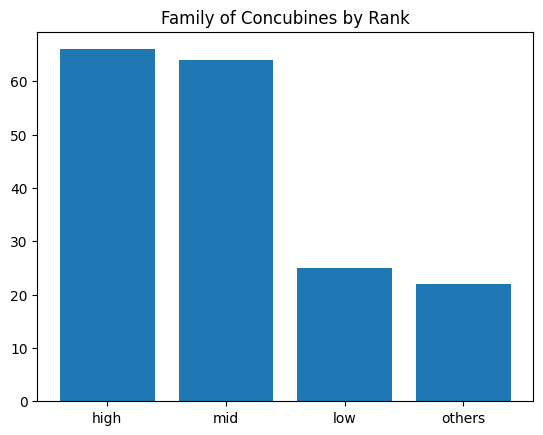

In [375]:
import matplotlib.pyplot as plt

x = ['high','mid','low','others']
y = len(highrank_df),len(midrank_df),len(lowrank_df),len(others_df)
plt.title('Family of Concubines by Rank')
plt.bar(x, height=y)

1. 후궁 어떻게 되는가?

1. 간택
- 정비(왕비)를 뽑을 때처럼, 후궁도 공식 간택을 통해 선발되는 경우가 있었다.
- 양반가의 규수 중에서 외모‧교양‧가문 등을 고려해 궁녀로 뽑히고, 이후 특별히 눈에 띄거나 총애를 받으면 후궁으로 승격됨.

2. 궁녀에서 승진
- 어린 나이에 궁에 들어와 궁녀로 일하다가 왕의 총애를 받아 후궁이 되는 방식

3. 왕의 필요에 따른 등용
- 예를 들어, 왕의 자손이 필요할 때 특정한 가문에서 여인을 불러 후궁으로 삼는 경우
- 이런 경우는 정치적 목적이 강하다. 특히 세자가 없거나 후계문제가 발생했을 때

`-` 위의 시각화로 알 수 있는 점

작호가 낮다는 것은 2번의 경우일 것이다. 어린 나이에 궁에서 일한다는 것은 신분이 낮다는 것이기 때문이다. 위의 시각화 내용을 볼 때 조선시대는 왕보다는 신하의 힘이 센 나라였기에 왕이 신하나 가문의 눈치를 보며 자신이 원하는 여자와 쉽게 결혼할 수 있는 분위기가 아니었을 것이라고 볼 수 있다.

`-` Problem

## 2-4. 상세히 기록된 계급별 후궁의 수

`-` 신분, 이름등 많은 것이 기록되지 않은 후궁은 제외

<BarContainer object of 4 artists>

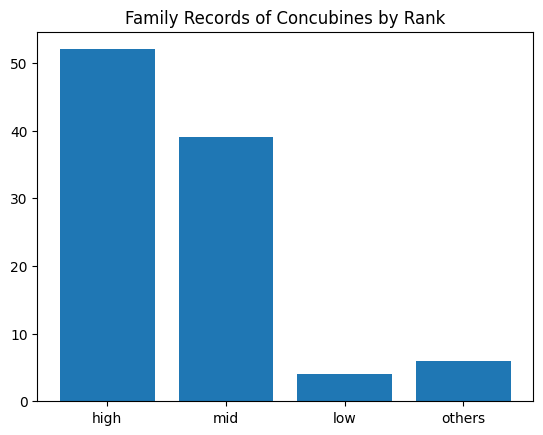

In [376]:
import matplotlib.pyplot as plt

x = ['high','mid','low','others']
y = len(highrank_df_final),len(midrank_df_final),len(lowrank_df_final),len(others_df_final)
plt.title('Family Records of Concubines by Rank')
plt.bar(x, height=y)

조선은 역시 신분사회였기에 낮은 신분의 사람들은 대다수가 기록되지 않은 것을 알 수 있다.

`-` Problem

## 2-5. 후궁을 가장 많이 배출한 가문

`-` high, mid만 고려

In [377]:
summ = highrank_df_final['본관_성씨'].value_counts() + midrank_df_final['본관_성씨'].value_counts()
freq = summ[summ > 0]
freq[freq >= 3]

본관_성씨
김해김씨    4.0
남양홍씨    4.0
동래정씨    3.0
밀양박씨    5.0
안동권씨    4.0
해평윤씨    3.0
Name: count, dtype: float64

---

`-` Resonance

# 3. 지역별 차이

김해김씨  -> 경상도 (김해)

남양홍씨  -> 경기도 (화성)

동래정씨  -> 경상도 (부산)

밀양박씨  -> 경상도 (밀양)

안동권씨  -> 경상도 (안동)

해평윤씨  -> 경상도 (구미)

청주한씨 -> 충청도 (청주)

안동김씨 -> 경상도 (안동)

청송심씨 -> 경상도

여흥민씨 -> 경기도 (여주)

반남박씨 -> 전라도 (나주)

청풍김씨 -> 충청도 (제천)

**경상도 : 7**

**경기도 : 2**

**충청도 : 2**

**전라도 : 1**

`-` 이유

**1. 경상도 특히 영남 지역(안동, 청송, 경주 등)은 조선시대 성리학 중심지로 자리 잡았다.**

영남학파(嶺南學派)
어떤 사상의 발달이 원숙하고 학자들의 사유의 심도가 깊어지면, 사리(事理)에 대한 시비곡직(是非曲直)을 판단하는 능력이 자생하고 나아가 견해를 같이하는 학문의 유파가 형성된다. 우리나라에서는 조선조에정주학(程朱學)주1의 학풍이 일면서부터 학맥(學脈)이 서서히 생기게 되었다.
영남 지방은 지리가 아름답고, 인심이 순후하고 전통적으로 학문을 좋아해 예로부터장상(將相)주2·공경(公卿)주3· 문장 · 덕행 · 절의로 유명한 이들과 선도(仙道) · 불도(佛道) · 도교(道敎)에 정통한 이들이 많이 나와서 세인들이 영남을 인재의 고장이라 불러 왔다.
그러한 탓인지 영남 지방에는 조선조 이후로 많은 학자들이 배출되어 여러 학맥이 생겨났다.
출처: 한국민족문화대백과사전

**2. 16세기 이후 사림(儒林)이 정치 중심 세력으로 부상하면서, 이들이 많이 활동하던 경상도 지역의 명문가들이 점점 힘을 얻었다.**

중종반정이후 왕권은 한 단계 약해졌고, 시기에 따라 기복이 있었으나 끝내 그 이전의 수준을 회복하지 못하였다. 토지와 노동력에 대한 국가의 공적 지배가 위축되고 양반 사족의 사적 지배가 확대되는 상황에서 직전을 폐지한 데 이어녹봉주24지급액도 줄여가야 하였다. 이러한 조건에서는 국왕이 정치를 주도하기 어려웠고, 의정부와 대신들도 지도력이 약해질 수밖에 없었다.
권력 다툼은 훈구세력과 사림세력의 대결로 단순화하기 어렵게 복잡한 구도를 띠어갔다. 특히 기묘사화 후 중종이 자신 및 세자의 외척이나 혼인관계를 맺은 가문의 인물들에 의존함으로써 이들이 세력화하였고, 이 양상은명종즉위 후까지 지속되어 한동안 외척정치 시기가 전개되었다. 이어서 명종 때에는 명종의 모친문정왕후(文定王后)가 8년의 수렴청정이 끝난 뒤에도 명종의 배후에서 권력을 행사하였다.
그런 가운데서도 양반 사족(士族)이 꾸준히 성장하여 사회 지배층이 되고, 이들로부터 배출되어 정치세력으로 활동하는 사림세력이 계속 늘자, 결국 정국의 주도권은 사림세력에게 넘어가게 되었다. 이 뒤로도 왕실과 혼인관계를 맺은 세력과 공신은 계속 등장하였으나, 이들은 과거와 달리 훈구라는 정체성을 표방하지 못하고 사림세력의 일부로 정착하였다.

출처: 한국민족문화대백과사전

**3. 경상도는 수도 한양과는 떨어져 있지만, 전쟁 시 피난처로 적합하고, 정치적 독립성을 갖기에도 좋은 위치였다.**

경상도는 조선 중기 이후 영남 사림의 본거지로 자리 잡으며 퇴계 이황 등의 성리학자들이 활동하며 지방에서 학문과 정치적 영향력을 키워냈다. 지방에서 서원을 중심으로 학문과 교육을 통해 자율적인 세력이 형성 되었는데, 조선 성종 시기 학문을 좋아하고 숭상했던 그는 문물을 한층 더 발전시키기 위해 그 진흥에 힘 썼으며, 이에 따라 학식과 덕행을 겸비한 인재들이 많이 발탁 되었는데 특히 영남 사림들이 대거 중앙 정계에 진출하였다. 
이처럼 서원은 단순한 교육 기관을 넘어, 지방 사림의 정치적 기반이었으며 학문 중심 세력은 곧 정치적 영향력으로 이어질 수 있었다. 지역에서 중앙과 어느 정도 거리감을 유지하면서도 학문과 재력, 인적 네트워크를 통해 스스로를 키울 수 있었다. 지방에서 자율적으로 성장한 가문은 중앙에 진입하기 위해 후궁이나 왕비를 전략적으로 입궁시키는 경우도 많았다.  이로 인해 중앙 권력에 휘둘리지 않으며 지방에서 자율적으로 성장 가능했다.

예) 퇴계 이황, 남명 조식 등 대표적인 성리학자들이 경상도 출신이다.

출처 : 우리역사넷

**4. 19세기 세도정치기에는 안동 김씨가 왕실과의 혼인을 반복하며 실권을 장악.**

본격적인 세도 정치는 정조 사후인 19세기에 시작되었다. 영조와 정조는 강화된 왕권을 바탕으로 정국을 주도하였다. 그러나 1800년 (순조 즉위) 11살의 나이에 즉위한 순조는 정조에 의해 선택된 김조순의 딸을 왕비로 맞이하였고, 이후 김조순을 중심으로 하는 안동 김씨가 정권을 장악하였다. 
이어서 순조의 명으로 1827년부터 왕세자가 대리청정을 하였으나, 3년 만인 1830년에 사망하였다. 세자는 조만영의 딸을 세자빈으로 맞아들였으므로 이후 풍양 조씨의 일족이 대거 정계에 진출하였다. 이들은 안동 김씨 일파와 세력 투쟁을 벌였고, 8살의 나이에 헌종이 즉위한 후에는 조만영의 동생 조인영을 중심으로 풍양 조씨가 한때 정권을 장악하였다. 
뒤를 이은 철종은 강화도에 살다가 갑자기 왕위에 올라 국왕이 되기 위한 소양을 갖추기 어려운 상태였으며, 역시 김조순의 집안사람인 김문근의 딸을 비로 맞아들여 이후 안동 김씨에 의한 세도 정치가 절정에 달하였다. 이처럼 19세기는 역량이 부족한 국왕이 잇따라 즉위하였고, 그 공백은 안동 김씨, 풍양 조씨, 연안 이씨, 풍산 홍씨, 경주 이씨, 동래 정씨 등 세도 가문의 권력 농단으로 채워졌다. (안동, 풍산, 경주, 동래 모두 경상도이다.) 이 시기 많은 왕비와 후궁이 경상도 본관 가문 출신이었다.

출처: 교과서 용어해설 | 우리역사넷

---

`-` Resonance

# 4. 후궁의 신분 상승

## 4-1. 후궁이 낳은 아들이 왕이 되는 경우

1. 선조의 정비(의인왕후 박씨)  -> 아이를 낳지 못하는 몸

2. 숙종의 정비(인경왕후 김씨) -> 딸만 낳고 죽었다.

첫째 딸. 《승정원일기》 264책 (탈초본 14책) 숙종 4년(1678년 청 강희(康熙) 17년 윤3월 13일 (계축)

-> 새로 태어난 공주가 졸서한 뒤, 대전에 정원과 옥당이 문안하니, 알았다고 답하였다.

둘째 딸. 《숙종실록》 8권, 숙종 5년(1679년 청 강희(康熙) 18년) 10월 23일 (갑신)

-> 중궁전이 해산을 하여 공주를 낳았으나, 이튿날 공주가 죽었다.

숙빈 최씨 사망

-> 1680년(숙종 6년) 10월 26일, 천연두를 앓은지 8일만에 경덕궁 회상전에서 승하하였다.

3. 정조의 정비(효의선황후) -> 상상임신으로 30여 개월 출산 준비를 하였다. (정조실록)

4. 성종의 정비(공혜왕후) -> 몸이 안좋아서 임신을 못하고 19세에 요절

-> 1474년 음력 4월 15일, 19세의 젊은 나이로 훙서하였다. 《성종실록》 5년(1474) 6월 7일 1번째 기사

2. 왕 낳으면 직위 상승

1. 광해군 생모 공빈 김씨 : 숙의 -> 귀인 -> 공빈

2. 영조 생모 숙빈 최씨 : 숙원 -> 숙의 -> 귀인 -> 숙빈

3. 순조 생모 수빈 박씨 : 숙의 ->수빈 

4. 경종 생모 희빈 장씨 : 숙원 -> 소의 -> 희빈 -> 왕비 -> 희빈

5. 연산군 생모 폐비 윤씨 : 숙의 -> 왕비

6. 중종 생모 정현왕후 : 숙의 -> 왕비 -> 왕대비

3. 정당성때문에 왕권 혹은 정치적 이슈가 있진 않았는지

case 1) 중종의 경우 중종반정이라는 형식으로 훈구파가 왕을 갈아치운 형태였기에 실권은 훈구세력에게 있고 왕은 정치적 상징에 불과함. 후궁의 자식이었기에 정통성보다는 훈구의 필요에 의해 선택된 왕이다는 해석이 있음.

case 2) 영조의 어머니는 궁녀 출신 후궁이었기에 즉위 초기부터 정통성 시비에 시달렸다. 특히 노론 vs 소론의 대립이 심각하였다. 이 갈등은 영조가 사도세자 사건을 일으키는 배경이 되었다.

-> 정통성 없는 왕의 자식이 왕세자가 되면 안된다는 일부 신하들의 반대가 있었고 사도세자를 의심하는 분위기가 조성되어 비극으로 이어짐.

-> 사도세자의 어머니 영빈 이씨는 궁녀에서 후궁으로 되었다.

# 결론

조선의 왕비와 후궁은 단순한 여성의 지위가 아닌, 왕권을 공고히 하기 위한 정치적 도구였습니다.
혼인을 통해 권력 가문과 손을 잡고, 후궁을 통해 궁중의 권력 균형을 조율했던 왕의 선택은 결국 국가의 향방까지 좌우하는 정치 행위였습니다.
이 분석은 조선 시대의 결혼이 개인의 사랑의 경우도 있었지만 대체적으로 정치였음을 보여줍니다.

또한 조선의 수도인 한양과 경상도는 거리상으로 멀었기에 경상도의 가문들은 왕권의 견제 없이 독자적으로 성장할 수 있었습니다. 그렇게 안동김씨, 밀양박씨, 동래정씨 등 명문가들이 탄생할 수 있었습니다.

조선에서 내가 낳은 자식이 왕이 된다는 것은 엄청난 경사였으며 신분상승까지 이루었습니다.